# 1.0 - IMPORTING , LOADING AND HELP FUNCTIONS

## 1.0.1 - Importing packages and modules for project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
from PIL import Image
from matplotlib import rcParams

## 1.0.2 - Loading Dataframe

In [2]:
df1 = pd.read_csv('cardio_train.csv', delimiter=';')

## 1.0.3 - HELP FUNCTIONS

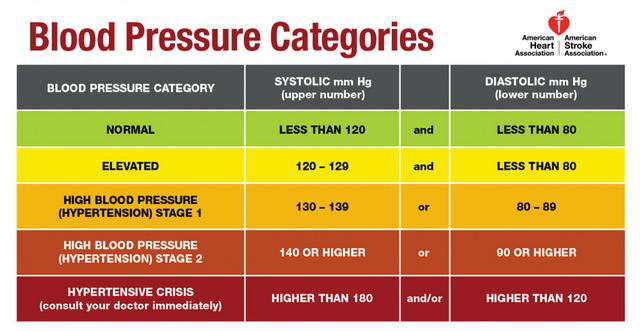

In [3]:
image = Image.open('blood.jpg')
image

In [4]:
# BLOOD PRESSURE
def categorize_blood_pressure(x):
  if x['ap_hi'] < 120 and x['ap_lo'] < 80:
    return "Normal"
  elif 120 <= x['ap_hi'] <= 129 and x['ap_lo'] < 80:
    return "Elevated"
  elif 130 <= x['ap_hi'] <= 139 or 80 <= x['ap_lo'] <= 89:
    return "High Blood Pressure(Stage 1)"
  elif  140 <= x['ap_hi'] <= 180 or 90 <= x['ap_lo'] <= 120:
    return "High Blood Pressure(Stage 2)"
  elif  (x['ap_hi'] > 180 and  x['ap_lo'] > 120) or (x['ap_hi'] > 180 or x['ap_lo'] > 120):
    return "Hypertensive Crisis"

# 2.0 - DATA DESCRIPTION

In [5]:
df2 = df1.copy()

## 2.0.1 - Descriptive Statistics - Knowing the Data

### 2.0.1.1 - General Description

In [6]:
df2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### 2.0.1.2 - Numerical Features Description

In [8]:
basic_describe = df1[['height', 'weight', 'ap_hi', 'ap_lo']].describe().T 

In [9]:
aditional_describe = {'Skew': df1[['height','weight','ap_lo','ap_hi']].skew(),
                      'Kurtosis': df1[['height','weight','ap_lo','ap_hi']].kurtosis(),
                      'Amplitude/Range': df1[['height','weight','ap_lo','ap_hi']].apply(lambda x : x.max() - x.min()),
                      'Median': df1[['height','weight','ap_lo','ap_hi']].median()}

mode = df1[['height','weight','ap_lo','ap_hi']].mode().T
mode = mode.rename(columns={0:'Mode'})

aditional_describe_table = pd.DataFrame(aditional_describe, columns=['Skew','Kurtosis','Amplitude/Range','Median'])

describe_table = aditional_describe_table.merge(mode,left_index=True, right_index=True)
describe_table = describe_table.merge(basic_describe, left_index=True, right_index=True)

In [10]:
describe_table

,Skew,Kurtosis,Amplitude/Range,Median,Mode,count,mean,std,min,25%,50%,75%,max
height,-0.642187,7.943653,195.0,165.0,165.0,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,1.012070,2.586825,190.0,72.0,65.0,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_lo,32.114083,1425.914585,11070.0,80.0,80.0,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
ap_hi,85.296214,7580.074738,16170.0,120.0,120.0,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0


**Descriptive Statistical Plots**

HISTOGRAMS (Skewness, Kurtosis)

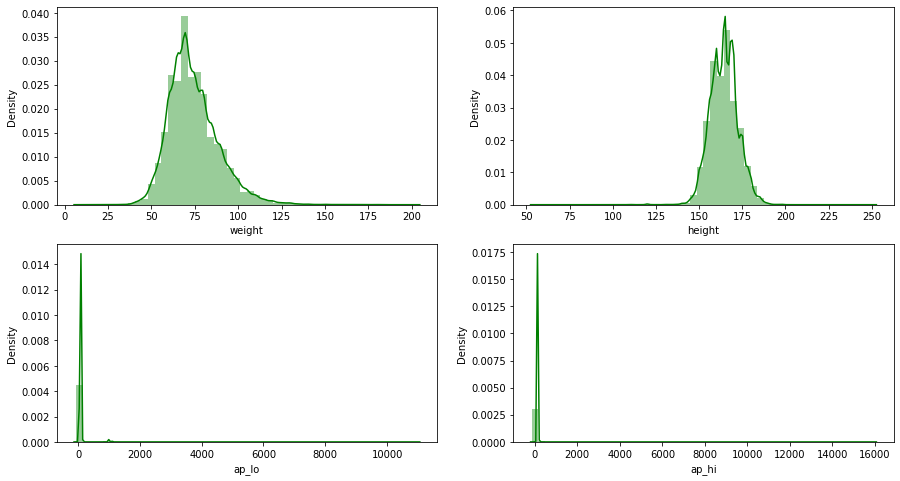

In [11]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(2,2,1)
sb.distplot(df2.weight, color='g')

plt.subplot(2,2,2)
sb.distplot(df2.height, color='g')

plt.subplot(2,2,3)
sb.distplot(df2.ap_lo, color='g')

plt.subplot(2,2,4)
sb.distplot(df2.ap_hi, color='g')

plt.show()

BOXPLOTS (Outliers)

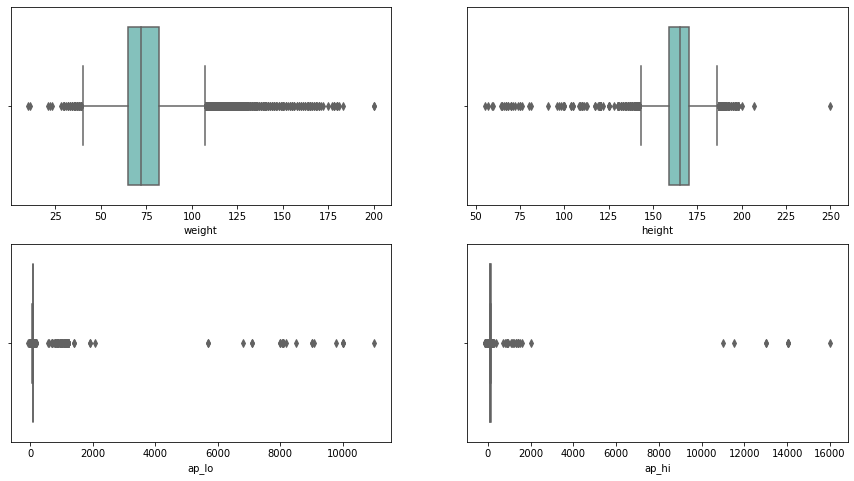

In [12]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(2,2,1)
sb.boxplot(df2.weight, palette="GnBu")

plt.subplot(2,2,2)
sb.boxplot(df2.height, palette="GnBu")

plt.subplot(2,2,3)
sb.boxplot(df2.ap_lo, palette="GnBu")

plt.subplot(2,2,4)
sb.boxplot(df2.ap_hi, palette="GnBu")

plt.show()

**Resume of numerical features analysis:**

1 - Note that the mode, average and median measures are very close to their values, this indicates that the variables are close to a normal distribution. **We probably won't need to normalize these variables.**

2 - There is a problem with the features ap_lo and ap_hi when observing kurtose, skewness, amplitude, min and max values, and std, as they are values that are very out of normal. **This can indicate bad values in these variables.**

3 - In the weight and height features, abnormal kurtosis and skewness measurements are also observed. **It can also indicate bad values.**

4 - In all variables a **high volume of Outliers** was observed. Depending on the model to be used, we may have problems.

### 2.0.1.3 - Categorical Features Description

**Table Frequency**

**- age feature**

In [13]:
df2['age_year'] = df2['age'].apply(lambda x : x // 365)

age = {'Age': df2['age_year'].unique(),
       'Frequency': df2['age_year'].value_counts(),
       'Relative_Frequency': round(df2['age_year'].value_counts() / df2['age_year'].value_counts().sum() * 100,2),}


age_frequency_table = pd.DataFrame(age, columns=['Age','Frequency','Relative_Frequency'])

age_frequency_table

,Age,Frequency,Relative_Frequency
55,50,3927,5.61
53,55,3868,5.53
57,51,3686,5.27
56,48,3607,5.15
54,47,3605,5.15
59,60,3576,5.11
49,61,3417,4.88
58,54,3409,4.87
51,40,3368,4.81
52,39,3279,4.68


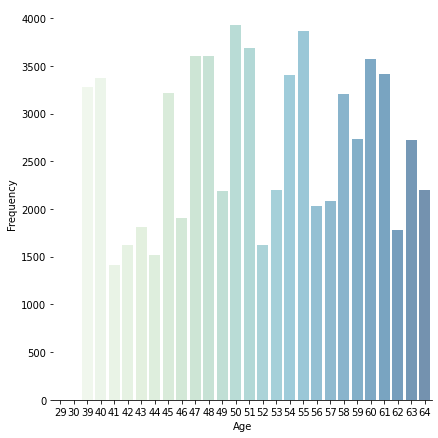

In [14]:
g = sb.catplot(
    data=df2, kind="bar",
    x=df2.age_year.unique(), y=df2.age_year.value_counts(), palette="GnBu", alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Age', "Frequency");

**- gender feature** (1 = Women . 2 = Men)

In [15]:
gender = {'Gender': df2['gender'].unique(),
          'Frequency': df2['gender'].value_counts(),
          'Relative_Frequency': round(df2['gender'].value_counts() / df2['gender'].value_counts().sum() * 100,2),}


gender_frequency_table = pd.DataFrame(gender, columns=['Gender','Frequency','Relative_Frequency'])

gender_frequency_table

,Gender,Frequency,Relative_Frequency
1,2,45530,65.04
2,1,24470,34.96


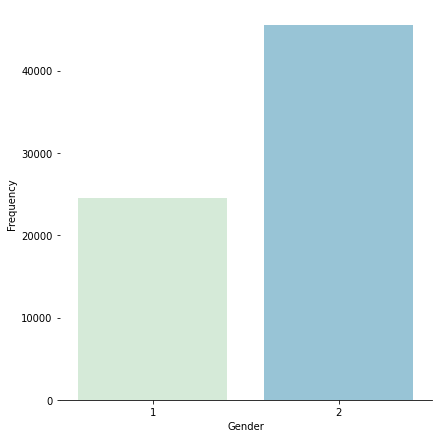

In [16]:
g = sb.catplot(data=df2, kind='bar', x=df2.gender.unique(), y=df2.gender.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Gender','Frequency');

**- cholesterol feature** (1 = normal, 2 = above normal, 3 = well above normal)

In [17]:
cholesterol = {'Cholesterol': df2['cholesterol'].unique(),
               'Frequency': df2['cholesterol'].value_counts(),
               'Relative_Frequency': round(df2['cholesterol'].value_counts() / df2['cholesterol'].value_counts().sum() * 100,2),}


cholesterol_frequency_table = pd.DataFrame(cholesterol, columns=['Cholesterol','Frequency','Relative_Frequency'])

cholesterol_frequency_table

,Cholesterol,Frequency,Relative_Frequency
1,1,52385,74.84
2,3,9549,13.64
3,2,8066,11.52


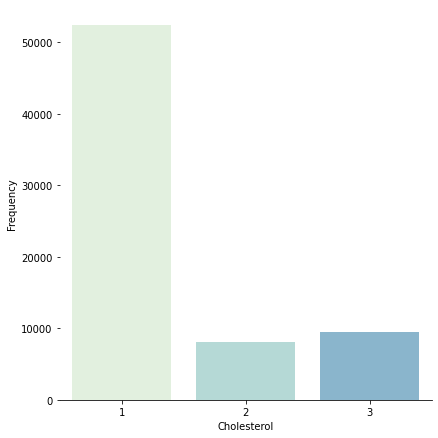

In [18]:
g = sb.catplot(data=df2, kind='bar', x=df2.cholesterol.unique(), y=df2.cholesterol.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Cholesterol','Frequency');

**- gluc feature** (1 = normal, 2 = above normal, 3 = well above normal)

In [19]:
gluc = {'Glucose': df2['gluc'].unique(),
               'Frequency': df2['gluc'].value_counts(),
               'Relative_Frequency': round(df2['gluc'].value_counts() / df2['gluc'].value_counts().sum() * 100,2),}


gluc_frequency_table = pd.DataFrame(gluc, columns=['Glucose','Frequency','Relative_Frequency'])

gluc_frequency_table

,Glucose,Frequency,Relative_Frequency
1,1,59479,84.97
3,2,5331,7.62
2,3,5190,7.41


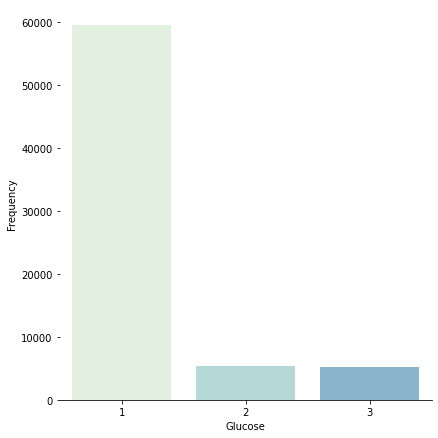

In [20]:
g = sb.catplot(data=df2, kind='bar', x=df2.gluc.unique(), y=df2.gluc.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Glucose','Frequency');

**- smoke feature** (0 = no smoke, 1 = smoke)

In [21]:
smoke = {'Smoke': df2['smoke'].unique(),
               'Frequency': df2['smoke'].value_counts(),
               'Relative_Frequency': round(df2['smoke'].value_counts() / df2['smoke'].value_counts().sum() * 100,2),}


smoke_frequency_table = pd.DataFrame(smoke, columns=['Smoke','Frequency','Relative_Frequency'])

smoke_frequency_table

,Smoke,Frequency,Relative_Frequency
0,0,63831,91.19
1,1,6169,8.81


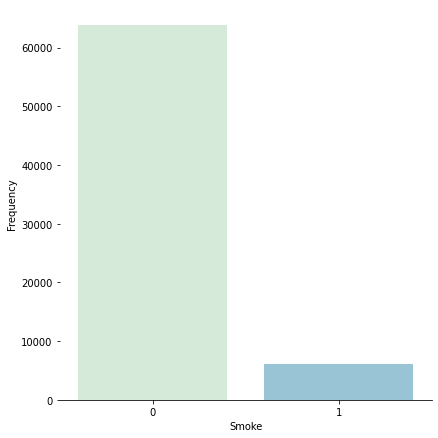

In [22]:
g = sb.catplot(data=df2, kind='bar', x=df2.smoke.unique(), y=df2.smoke.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Smoke','Frequency');

**- alco feature** (0 = no alcohol, 1 = alcohol)

In [23]:
alco = {'Alcohol': df2['alco'].unique(),
               'Frequency': df2['alco'].value_counts(),
               'Relative_Frequency': round(df2['alco'].value_counts() / df2['alco'].value_counts().sum() * 100,2),}


alco_frequency_table = pd.DataFrame(alco, columns=['Alcohol','Frequency','Relative_Frequency'])

alco_frequency_table

,Alcohol,Frequency,Relative_Frequency
0,0,66236,94.62
1,1,3764,5.38


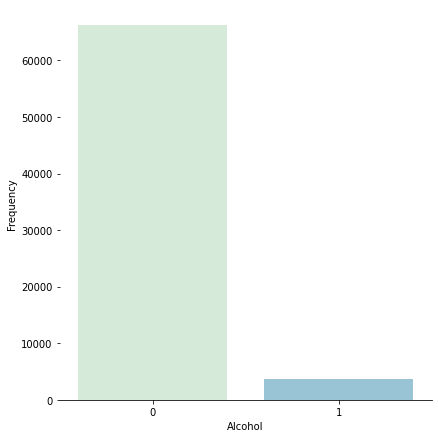

In [24]:
g = sb.catplot(data=df2, kind='bar', x=df2.alco.unique(), y=df2.alco.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Alcohol','Frequency');

**- active feature** (0 = no active, 1 = active)

In [25]:
active = {'Active': df2['active'].unique(),
               'Frequency': df2['active'].value_counts(),
               'Relative_Frequency': round(df2['active'].value_counts() / df2['active'].value_counts().sum() * 100,2),}


active_frequency_table = pd.DataFrame(active, columns=['Active','Frequency','Relative_Frequency'])

active_frequency_table

,Active,Frequency,Relative_Frequency
1,1,56261,80.37
0,0,13739,19.63


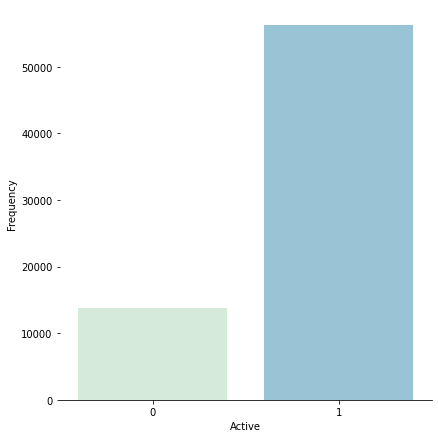

In [26]:
g = sb.catplot(data=df2, kind='bar', x=df2.active.unique(), y=df2.active.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Active','Frequency');

**- cardio feature** (0 = no diesease, 1 = diesease)

In [27]:
cardio = {'Cardio': df2['cardio'].unique(),
               'Frequency': df2['cardio'].value_counts(),
               'Relative_Frequency': round(df2['cardio'].value_counts() / df2['cardio'].value_counts().sum() * 100,2),}


cardio_frequency_table = pd.DataFrame(cardio, columns=['Cardio','Frequency','Relative_Frequency'])

cardio_frequency_table

,Cardio,Frequency,Relative_Frequency
0,0,35021,50.03
1,1,34979,49.97


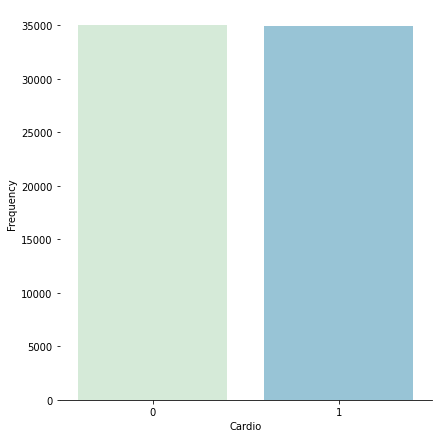

In [28]:
g = sb.catplot(data=df2, kind='bar', x=df2.cardio.unique(), y=df2.cardio.value_counts(), palette="GnBu", 
               alpha=.6, height=6);
g.despine(left=True);
g.set_axis_labels('Cardio','Frequency');

**Resume of categorical features analysis:**

1 - **cardio** feature:
    - This is the TARGET feature. It's not need to be balanced with SMOTE or NearMiss techniques.

2 -  **active, alco, smoke, gender** features:
    - All are subjective features, there is no predefined label classes.
    - I am assuming the values: 0 = no active, 1 = active
                                0 = no alcohol, 1 = alcohol
                                0 = no smoke, 1 = smoke
                                1 = Women . 2 = Men
    
3 - **gluco,cholesterol** features:
    - Based on laboratory medical examinations.
    - According to [Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset), the classes were defined as: 1 =  normal, 2 = above normal, 3 = well above normal

4 - **gender** feature:
    - There is no predefined label classes.
    - I am assuming the values: 

5 - **age** feature:
    - Describes ages in days. 
    - Must be changed for years

## 2.0.2 - Hypothesis Mind Map

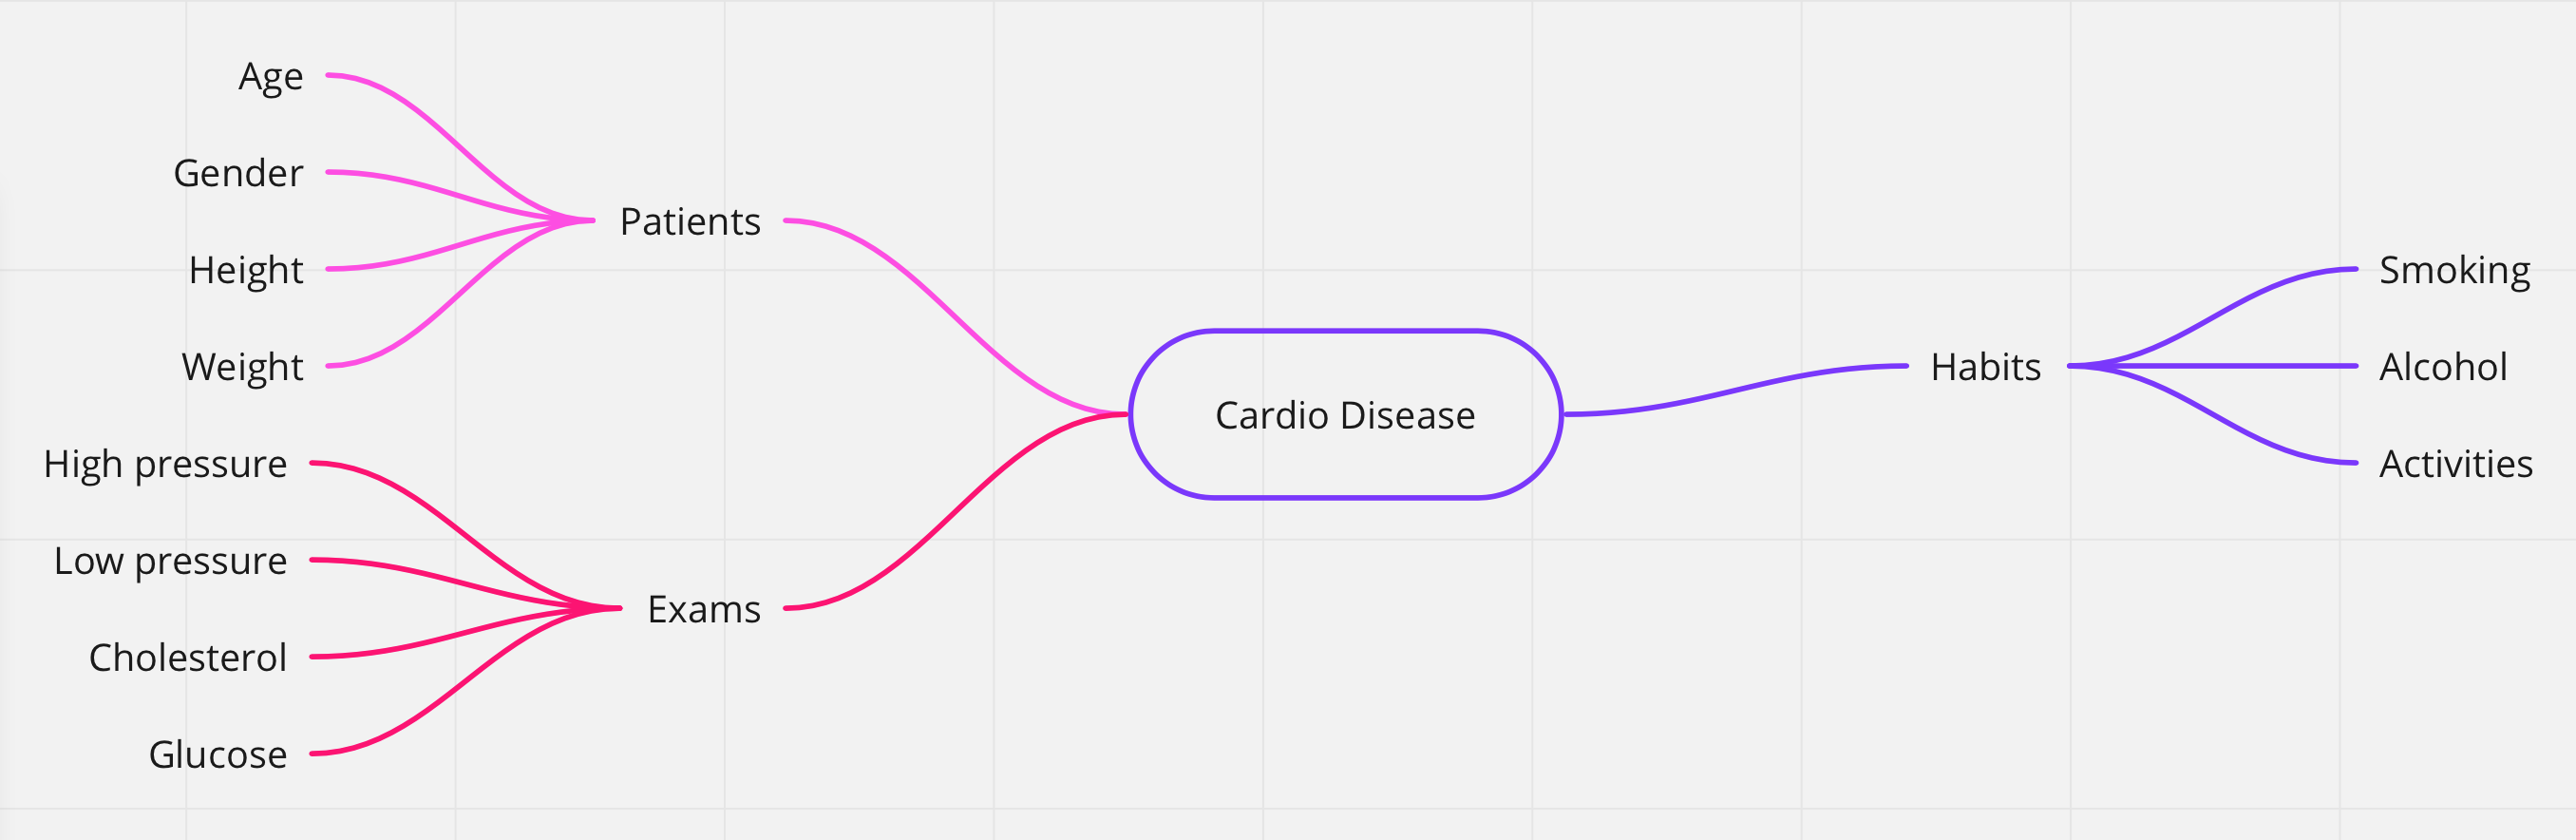

In [29]:
image = Image.open('mindmap.png')
image

## 2.0.3 - Creation of Hypotheses

#### 2.0.1.5.1 - Patients Hypotheses

1 - Do men have more heart diseases than women?

2 - Do older patients have heart disease?

3 - Do patients with more weight have heart disease?

4 - Does height not influence the development of heart disease?

#### 2.0.1.5.2 - Exams Hypotheses

1 - High cholesterol patients are more likely to have heart disease?

2 - Does blood pressure increase the risk of heart disease?

3 - Low blood pressure at high risk of heart disease?

4 - Does the rate of glucose in the blood increase the risk of heart disease?

#### 2.0.1.5.3 - Habits Hypotheses

1 - Smokers have more heart disease?

2 - Who practices physical activities do not develop heart disease?

3 - Does drinking alcohol increase the chances of heart disease?

# 3.0 - FEATURE ENGINEER

In [30]:
df3 = df2.copy()

## 3.0.1 - Data Transformation

**- Removing id column**

In [31]:
df3 = df3.drop(columns='id')

**- Changing age (in days) column to age (in year) column**

In [32]:
df3['age'] = df3['age'].apply(lambda x : x // 365)

**- Changing dtype of height feature to float64**

In [33]:
df3['height'] = df3.height.astype('float64') 

**- Removing age_year column**

In [34]:
df3 = df3.drop(columns='age_year')

***- Removing Outliers***

 - weight feature

In [35]:
Q1_weight = df3.weight.quantile(.25)
Q3_weight = df3.weight.quantile(.75) 

IQR_weight = Q3_weight - Q1_weight

lower_limit_weight = Q1_weight - 1.5 * IQR_weight
upper_limit_weight = Q3_weight + 1.5 * IQR_weight

lower_limit_weight , upper_limit_weight

(39.5, 107.5)

In [36]:
df3.weight[(df3.weight < lower_limit_weight) | (df3.weight > upper_limit_weight)] 

15       112.0
62       115.0
83       110.0
196      108.0
267      115.0
         ...  
69873    108.0
69946    115.0
69947    113.0
69981    110.0
69996    126.0
Name: weight, Length: 1819, dtype: float64

In [37]:
df3 = df3[(df3.weight > lower_limit_weight) & (df3.weight < upper_limit_weight)]

 - height feature

In [38]:
Q1_height = df3.height.quantile(.25)
Q3_height = df3.height.quantile(.75) 

IQR_height = Q3_height - Q1_height

lower_limit_height = Q1_height - 1.5 * IQR_height
upper_limit_height = Q3_height + 1.5 * IQR_height

df3.height[(df3.height < lower_limit_height) | (df3.height > upper_limit_height)]

df3 = df3[(df3.height > lower_limit_height) & (df3.height < upper_limit_height)]

 - ap_lo feature

In [39]:
Q1_ap_lo = df3.ap_lo.quantile(.25)
Q3_ap_lo = df3.ap_lo.quantile(.75) 

IQR_ap_lo = Q3_ap_lo - Q1_ap_lo

lower_limit_ap_lo = Q1_ap_lo - 1.5 * IQR_ap_lo
upper_limit_ap_lo = Q3_ap_lo + 1.5 * IQR_ap_lo

df3.ap_lo[(df3.ap_lo < lower_limit_ap_lo) | (df3.ap_lo > upper_limit_ap_lo)]

df3 = df3[(df3.ap_lo > lower_limit_ap_lo) & (df3.ap_lo < upper_limit_ap_lo)]

 - ap_hi feature

In [40]:
Q1_ap_hi = df3.ap_hi.quantile(.25)
Q3_ap_hi = df3.ap_hi.quantile(.75) 

IQR_ap_hi = Q3_ap_hi - Q1_ap_hi

lower_limit_ap_hi = Q1_ap_hi - 1.5 * IQR_ap_hi
upper_limit_ap_hi = Q3_ap_hi + 1.5 * IQR_ap_hi

df3.ap_hi[(df3.ap_hi < lower_limit_ap_hi) | (df3.ap_hi > upper_limit_ap_hi)]

df3 = df3[(df3.ap_hi > lower_limit_ap_hi) & (df3.ap_hi < upper_limit_ap_hi)]

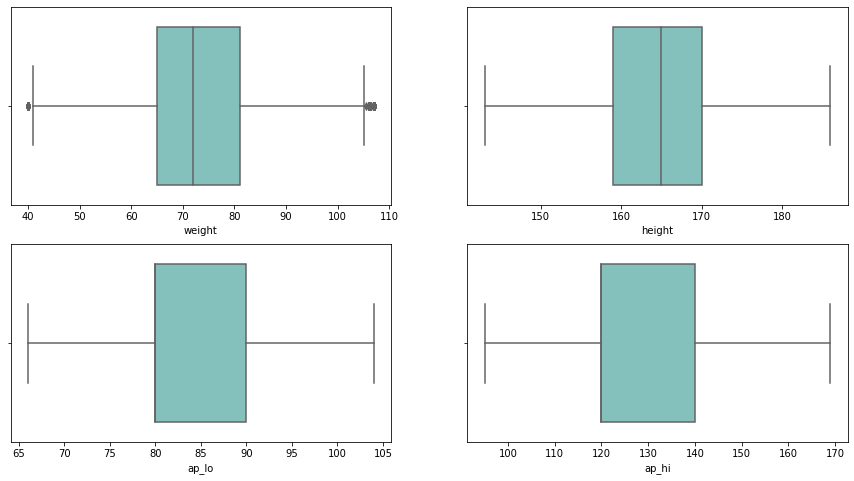

In [41]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(2,2,1)
sb.boxplot(df3.weight, palette="GnBu")

plt.subplot(2,2,2)
sb.boxplot(df3.height, palette="GnBu")

plt.subplot(2,2,3)
sb.boxplot(df3.ap_lo, palette="GnBu")

plt.subplot(2,2,4)
sb.boxplot(df3.ap_hi, palette="GnBu")

plt.show()

Let's try again with the weight variable

In [42]:
Q1_weight = df3.weight.quantile(.25)
Q3_weight = df3.weight.quantile(.75) 

IQR_weight = Q3_weight - Q1_weight

lower_limit_weight = Q1_weight - 1.5 * IQR_weight
upper_limit_weight = Q3_weight + 1.5 * IQR_weight

df3.weight[(df3.weight < lower_limit_weight) | (df3.weight > upper_limit_weight)] 

df3 = df3[(df3.weight > lower_limit_weight) & (df3.weight < upper_limit_weight)]

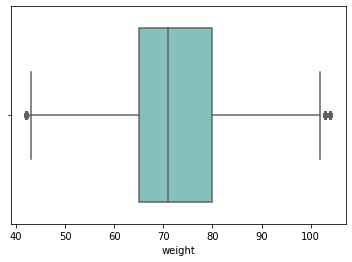

In [43]:
plt.rcParams['figure.figsize'] = (6,4)
sb.boxplot(df3.weight, palette="GnBu");

One again !

In [44]:
Q1_weight = df3.weight.quantile(.25)
Q3_weight = df3.weight.quantile(.75) 

IQR_weight = Q3_weight - Q1_weight

lower_limit_weight = Q1_weight - 1.5 * IQR_weight
upper_limit_weight = Q3_weight + 1.5 * IQR_weight

df3.weight[(df3.weight < lower_limit_weight) | (df3.weight > upper_limit_weight)] 

df3 = df3[(df3.weight > lower_limit_weight) & (df3.weight < upper_limit_weight)]

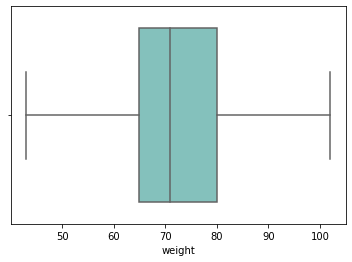

In [45]:
sb.boxplot(df3.weight, palette="GnBu");

**OK ! Finally !!! All of numerical features no have Ouliers anymore**

***- Plotting Histogram***

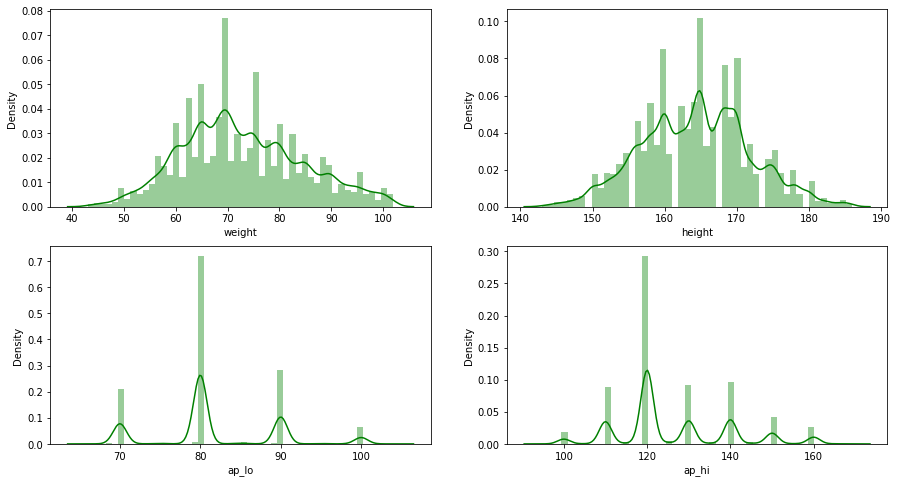

In [46]:
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(2,2,1)
sb.distplot(df3.weight, color='g')

plt.subplot(2,2,2)
sb.distplot(df3.height, color='g')

plt.subplot(2,2,3)
sb.distplot(df3.ap_lo, color='g')

plt.subplot(2,2,4)
sb.distplot(df3.ap_hi, color='g')

plt.show()

In [47]:
df3.shape

(60769, 12)

***- Transforming height (cm) feature in height (m)***

In [48]:
#df3['height'] = df3['height'].apply(lambda x : x / 100)  

In [49]:
df3.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168.0,62.0,110,80,1,1,0,0,1,0
1,55,1,156.0,85.0,140,90,3,1,0,0,1,1
2,51,1,165.0,64.0,130,70,3,1,0,0,0,1
3,48,2,169.0,82.0,150,100,1,1,0,0,1,1
5,60,1,151.0,67.0,120,80,2,2,0,0,0,0


## 3.0.2 - Validating the Hypotheses

**Facilitating the visualization of classes**

In [50]:
aux = df3.copy()

gender_values = {1:'Man', 2:'Woman'}
cholesterol_values = {1:'Normal', 2:'Above Normal', 3: 'Well Above Normal'}
glucose_values = {1:'Normal', 2:'Above Normal', 3:'Well Above Normal'}
smoke_values = {0:'Yes', 1:'No'}
alcohol_values = {0:'No', 1:'Yes'}
active_values = {0:'No', 1:'Yes'}
cardio_values = {0:'No', 1:'Yes'}

aux = aux.replace({'gender': gender_values, 
                   'cholesterol': cholesterol_values,
                   'gluc': glucose_values,
                   'smoke': smoke_values,
                   'alco': alcohol_values,
                   'active': active_values,
                   'cardio': cardio_values})
aux.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,Woman,168.0,62.0,110,80,Normal,Normal,Yes,No,Yes,No
1,55,Man,156.0,85.0,140,90,Well Above Normal,Normal,Yes,No,Yes,Yes
2,51,Man,165.0,64.0,130,70,Well Above Normal,Normal,Yes,No,No,Yes
3,48,Woman,169.0,82.0,150,100,Normal,Normal,Yes,No,Yes,Yes
5,60,Man,151.0,67.0,120,80,Above Normal,Above Normal,Yes,No,No,No


### 3.0.2.1 - Bivariate Analysis

#### 3.0.2.1.1 - Patients Hypotheses

1 - Do men have more heart diseases than women?

**TRUE:** Apparently, men suffer more from heart disease than women.

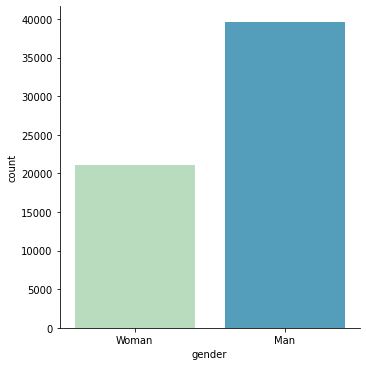

In [51]:
rcParams['figure.figsize'] = 8, 5
sb.catplot(x='gender', kind='count', data = aux, palette="GnBu");

2 - Do older patients have heart disease?

**TRUE:** 
From 55 years of old the patient starts to take risks of acquiring heart diseases.

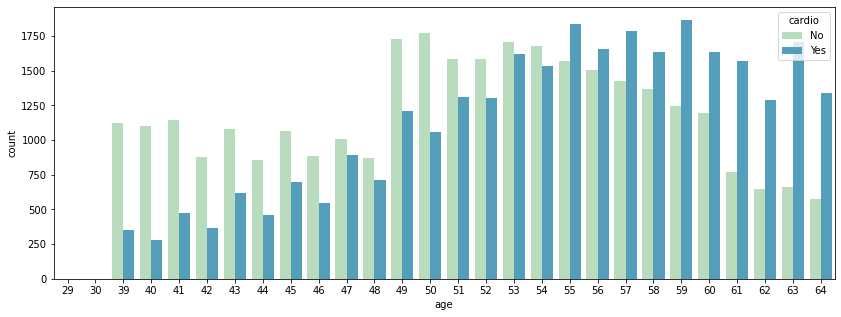

In [52]:
rcParams['figure.figsize'] = 14, 5
sb.countplot(x='age', hue='cardio', data=aux, palette='GnBu');

3 - Do patients with more weight have heart disease?

**FALSE** - Patients weighing between 60 and 80 are more likely to have heart disease

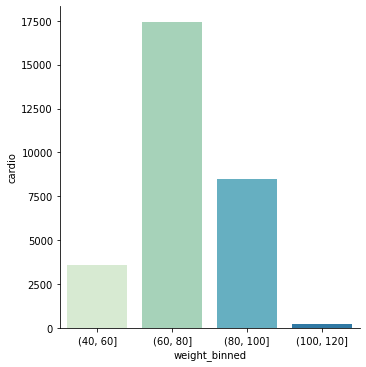

In [53]:
bins = list(np.arange(40,130,20))

aux1 = df3[['weight','cardio']].groupby('weight').sum().reset_index()

aux1['weight_binned'] = pd.cut(aux1['weight'], bins=bins)

aux1 = aux1[['weight_binned','cardio']].groupby('weight_binned').sum().reset_index()
rcParams['figure.figsize'] = 14, 5
sb.catplot(x='weight_binned', y='cardio', data=aux1, palette='GnBu', kind='bar');

4 - Does height not influence the development of heart disease?

**FALSE** - Taller patients tend to suffer from heart disease.

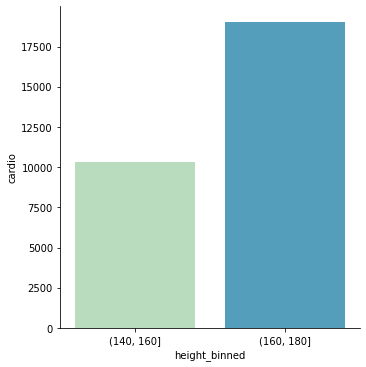

In [54]:
bins = list(np.arange(140,200,20))

aux2 = df3[['height','cardio']].groupby('height').sum().reset_index()

aux2['height_binned'] = pd.cut(aux2['height'], bins=bins)

aux2 = aux2[['height_binned','cardio']].groupby('height_binned').sum().reset_index()
rcParams['figure.figsize'] = 14, 5
sb.catplot(x='height_binned', y='cardio', data=aux2, palette='GnBu', kind='bar');

#### 3.0.2.1.2 - Exams Hypotheses

1 - High cholesterol patients are more likely to have heart disease?

**TRUE:** Apparently cardio disease occurs in patients with well above and above normal cholesterol.

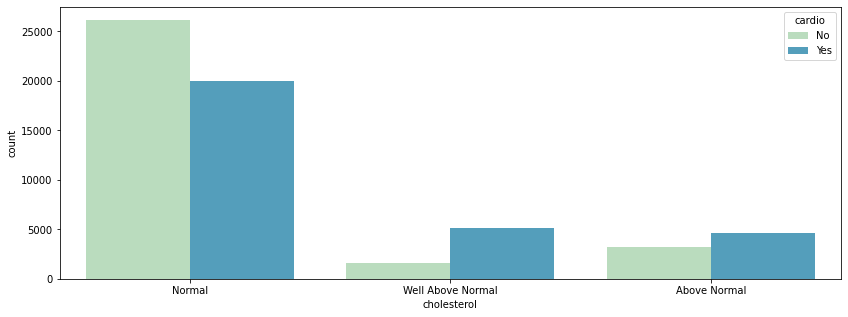

In [55]:
sb.countplot(x='cholesterol', hue='cardio',data=aux, palette='GnBu');

2 - Does blood pressure increase the risk of heart disease?

**TRUE** Starting high blood pressure STAGE 2 

In [56]:
df3['blood_category'] = df3.apply(categorize_blood_pressure, axis=1)

In [57]:
df3.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,blood_category
0,50,2,168.0,62.0,110,80,1,1,0,0,1,0,High Blood Pressure(Stage 1)
1,55,1,156.0,85.0,140,90,3,1,0,0,1,1,High Blood Pressure(Stage 2)
2,51,1,165.0,64.0,130,70,3,1,0,0,0,1,High Blood Pressure(Stage 1)
3,48,2,169.0,82.0,150,100,1,1,0,0,1,1,High Blood Pressure(Stage 2)
5,60,1,151.0,67.0,120,80,2,2,0,0,0,0,High Blood Pressure(Stage 1)


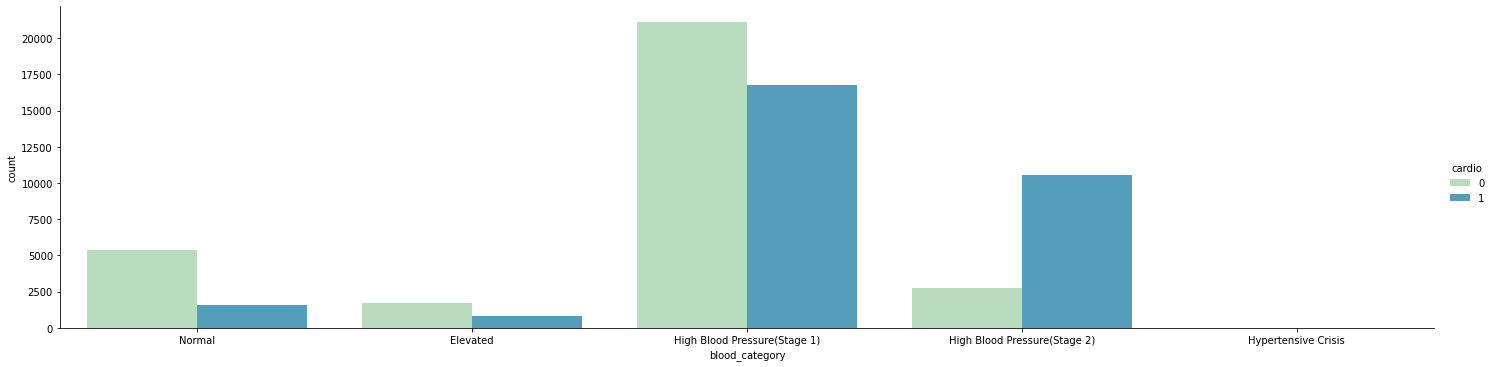

In [58]:
rcParams['figure.figsize'] = 8, 55
sb.factorplot('blood_category', data=df3, kind='count', aspect=4.0,hue='cardio', palette='GnBu', order=['Normal', 'Elevated', 'High Blood Pressure(Stage 1)', 'High Blood Pressure(Stage 2)','Hypertensive Crisis']);

3 - Does the rate of glucose in the blood increase the risk of heart disease?

**TRUE:** Apparently cardio disease occurs in patients with above and well above rate glucose.

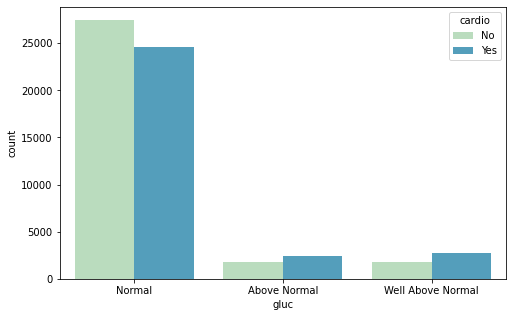

In [59]:
rcParams['figure.figsize'] = 8, 5
sb.countplot(x='gluc', hue='cardio',data=aux, palette='GnBu');

#### 3.0.2.1.3 - Habits Hypotheses

1 - Smokers have more heart disease?

**TRUE:** Smokers are more likely to have heart disease.

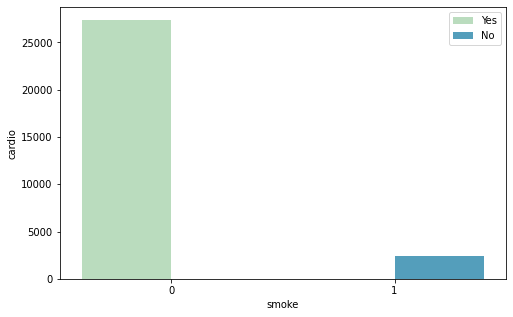

In [60]:
aux1 = df3[['smoke','cardio']].groupby('smoke').sum().reset_index()

rcParams['figure.figsize'] = 8, 5

sb.barplot(x='smoke', y='cardio', data=aux1, hue=['Yes','No'], palette='GnBu');

2 - Who practices physical activities do not develop heart disease?

**TRUE:** Apparently who practice physical activities do not develop heart disease.

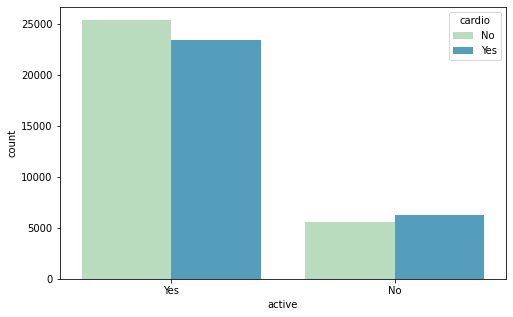

In [61]:
rcParams['figure.figsize'] = 8, 5
sb.countplot(x='active', hue='cardio',data=aux, palette='GnBu');

3 - Does drinking alcohol increase the chances of heart disease?

**TRUE:** Alcohol consumption increases the chances of heart disease.

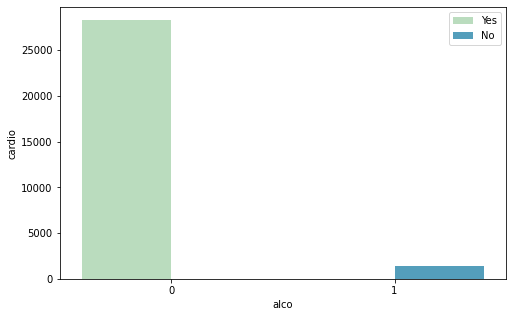

In [62]:
aux2 = df3[['alco','cardio']].groupby('alco').sum().reset_index()

rcParams['figure.figsize'] = 8, 5

sb.barplot(x='alco', y='cardio', data=aux2, hue=['Yes','No'], palette='GnBu');

### 3.0.2.2 - Multivariate Analysis

#### 3.0.2.2.1 - Numerical Features Analysis

#### 3.0.2.2.2 - Categorical Features Analysis